In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("underwater_temperature.csv", encoding='latin-1')

In [3]:
df

,ID,Site,Latitude,Longitude,Date,Time,Temp (°C),Depth
0,1,Ilha Deserta,27.2706,48.3310,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.3310,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.3310,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.3310,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.3310,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
408633,408634,lha do Xavier,27.6092,48.3858,2013/03/07,09:03:29,24.931,5.0
408634,408635,lha do Xavier,27.6092,48.3858,2013/03/07,09:23:29,24.931,5.0
408635,408636,lha do Xavier,27.6092,48.3858,2013/03/07,09:43:29,24.931,5.0
408636,408637,lha do Xavier,27.6092,48.3858,2013/03/07,10:03:29,24.931,5.0


In [4]:
df.drop(["ID","Site"],axis= 1,inplace=True)

In [5]:
df.head()

,Latitude,Longitude,Date,Time,Temp (°C),Depth
0,27.2706,48.331,2013/02/20,11:40:02,24.448,12.0
1,27.2706,48.331,2013/02/20,12:00:03,24.448,12.0
2,27.2706,48.331,2013/02/20,12:20:04,24.545,12.0
3,27.2706,48.331,2013/02/20,12:40:05,24.448,12.0
4,27.2706,48.331,2013/02/20,13:00:06,24.351,12.0


In [6]:
df.describe()

,Latitude,Longitude,Temp (°C),Depth
count,408638.000000,408638.000000,408634.000000,408638.000000
mean,27.385022,48.432279,20.759051,12.010513
std,0.509617,0.096028,2.980158,6.177916
min,26.367900,48.331000,14.421000,5.000000
25%,27.180400,48.385800,18.236000,5.000000
50%,27.270600,48.408000,20.615000,12.000000
75%,27.611100,48.522000,23.100000,12.000000
max,28.446100,48.708700,29.252000,22.100000


In [7]:
df.isna().any()

Latitude     False
Longitude    False
Date         False
Time         False
Temp (°C)     True
Depth        False
dtype: bool

In [8]:
df[df["Temp (°C)"].isna()]

,Latitude,Longitude,Date,Time,Temp (°C),Depth
119712,27.1719,48.408,2014/08/19,14:52:57,NaN,12.0
119713,27.1719,48.408,2014/08/19,14:52:58,NaN,12.0
119714,27.1719,48.408,2014/08/19,14:52:59,NaN,12.0
119715,27.1719,48.408,2014/08/19,14:53:00,NaN,12.0


In [9]:
df = df.drop([df.index[119712] , df.index[119713], df.index[119714], df.index[119715]]) 

In [10]:
df.isna().any()

Latitude     False
Longitude    False
Date         False
Time         False
Temp (°C)    False
Depth        False
dtype: bool

Text(0.5, 1.0, 'Dot Plot: Depth vs. Temperature')

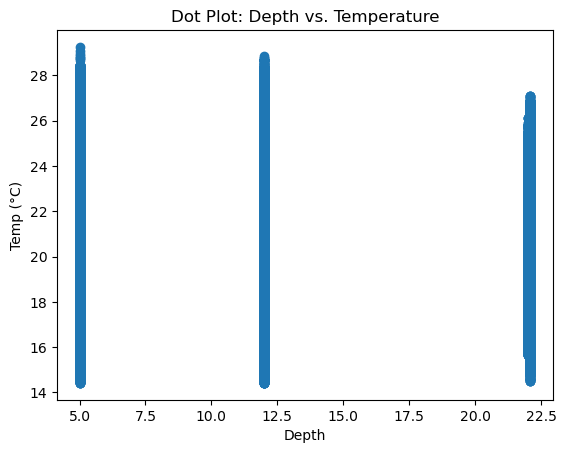

In [11]:
plt.scatter(df['Depth'], df['Temp (°C)'])
plt.xlabel('Depth')
plt.ylabel('Temp (°C)')
plt.title('Dot Plot: Depth vs. Temperature')

Text(0.5, 1.0, 'Dot Plot: Latitude vs. Temperature')

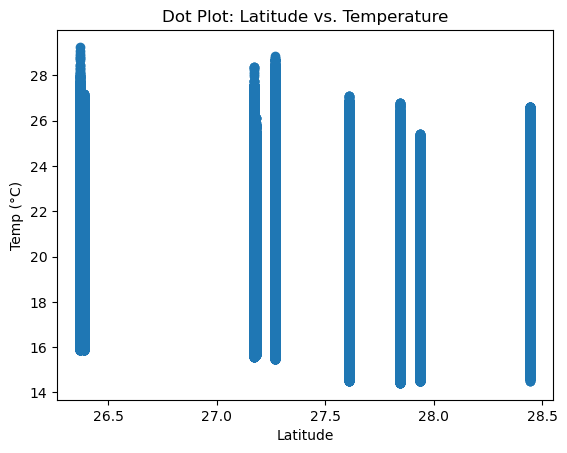

In [12]:
plt.scatter(df['Latitude'], df['Temp (°C)'])
plt.xlabel('Latitude')
plt.ylabel('Temp (°C)')
plt.title('Dot Plot: Latitude vs. Temperature')

Text(0.5, 1.0, 'Dot Plot: Longitude vs. Temperature')

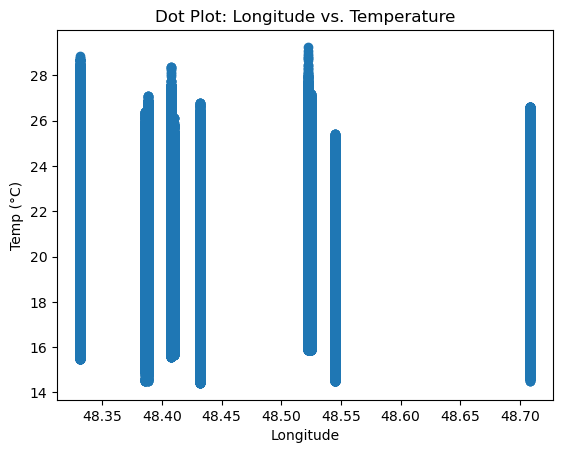

In [13]:
plt.scatter(df['Longitude'], df['Temp (°C)'])
plt.xlabel('Longitude')
plt.ylabel('Temp (°C)')
plt.title('Dot Plot: Longitude vs. Temperature')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])
df['Day'] = df['Date'].dt.dayofyear

df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

In [15]:
df.head()

,Latitude,Longitude,Date,Time,Temp (°C),Depth,Day,Hour,Minute
0,27.2706,48.331,2013-02-20,2023-10-11 11:40:02,24.448,12.0,51,11,40
1,27.2706,48.331,2013-02-20,2023-10-11 12:00:03,24.448,12.0,51,12,0
2,27.2706,48.331,2013-02-20,2023-10-11 12:20:04,24.545,12.0,51,12,20
3,27.2706,48.331,2013-02-20,2023-10-11 12:40:05,24.448,12.0,51,12,40
4,27.2706,48.331,2013-02-20,2023-10-11 13:00:06,24.351,12.0,51,13,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df[['Latitude', 'Longitude', 'Depth', 'Day', 'Hour', 'Minute']]
y=df["Temp (°C)"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# LinearRegression

In [31]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [32]:
(reg.score(x_test, y_test))*100

20.91125326852041

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
(RFR.score(x_test, y_test))*100

93.89894081168325

In [35]:
y_pred=RFR.predict(x_test)

In [36]:
results=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [37]:
results

,Actual,Predicted
138602,21.664,21.801409
52922,23.869,23.828690
72379,26.195,26.112110
367931,20.234,20.296720
252719,22.908,23.079840
...,...,...
352173,25.125,24.774750
348771,23.196,23.194080
255198,23.773,23.675080
385640,17.855,17.909150
